In [2]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('default')

In [6]:
#dados
from google.colab import files
agendamentos = pd.read_csv('/content/drive/MyDrive/python/agendamentos.csv')
financeiro = pd.read_csv('/content/drive/MyDrive/python/financeiro.csv')
profissionais = pd.read_csv('/content/drive/MyDrive/python/profissionais.csv')

agendamentos.head()




,agendamento_id,cliente_id,data,servico,profissional,status
0,1001,1,2024-01-10,Botox,Ana,Compareceu
1,1002,2,2024-01-12,Limpeza de Pele,Bruno,Compareceu
2,1003,3,2024-01-14,Laser,Carla,Faltou
3,1004,4,2024-01-16,Preenchimento,Ana,Compareceu
4,1005,5,2024-01-18,Drenagem,Bruno,Cancelou


In [7]:
#conferencia de colunas
print("Agendamentos:", agendamentos.columns)
print("Financeiro:", financeiro.columns)
print("Profissionais:", profissionais.columns)

Agendamentos: Index(['agendamento_id', 'cliente_id', 'data', 'servico', 'profissional',
       'status'],
      dtype='object')
Financeiro: Index(['agendamento_id', 'valor_cobrado', 'custo_servico'], dtype='object')
Profissionais: Index(['profissional', 'especialidade', 'salario_fixo'], dtype='object')


In [9]:
#datas
agendamentos['data'] = pd.to_datetime(agendamentos['data'])


In [11]:
#junçao dos dados
df = agendamentos.merge(
    financeiro,
    on='agendamento_id',
    how='left'
).merge(
    profissionais,
    on='profissional',
    how='left'
)

df.head()

,agendamento_id,cliente_id,data,servico,profissional,status,valor_cobrado,custo_servico,especialidade,salario_fixo
0,1001,1,2024-01-10,Botox,Ana,Compareceu,1200,350,Facial,4000
1,1002,2,2024-01-12,Limpeza de Pele,Bruno,Compareceu,180,60,Corporal,3800
2,1003,3,2024-01-14,Laser,Carla,Faltou,300,120,Laser,4200
3,1004,4,2024-01-16,Preenchimento,Ana,Compareceu,1500,500,Facial,4000
4,1005,5,2024-01-18,Drenagem,Bruno,Cancelou,200,80,Corporal,3800


In [13]:
#Faturamento por profissional
faturamento_profissional = (
    df.groupby('profissional')['valor_cobrado']
    .sum()
    .sort_values(ascending=False)
)

faturamento_profissional

,valor_cobrado
profissional,
Ana,33800
Bruno,33800
Carla,33800


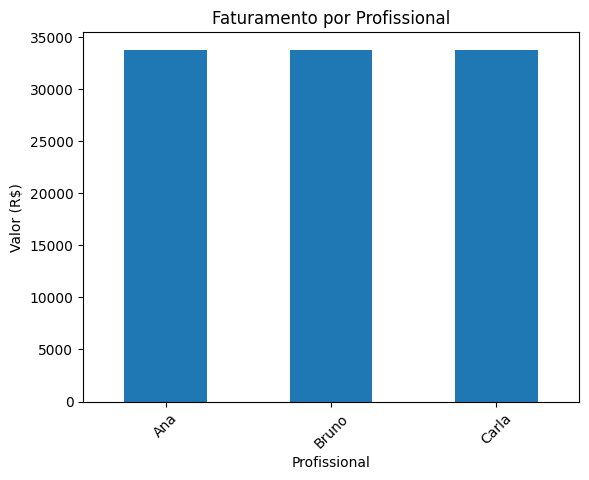

In [15]:
#grafico faturamento profissional
plt.figure()
faturamento_profissional.plot(kind='bar')
plt.title('Faturamento por Profissional')
plt.xlabel('Profissional')
plt.ylabel('Valor (R$)')
plt.xticks(rotation=45)
plt.show()


In [20]:
#atendimento por profissional
atendimentos_profissional = (
    df[df['status'] == 'Compareceu']
    .groupby('profissional')
    .size()
    .sort_values(ascending=False)
)

atendimentos_profissional

,0
profissional,
Ana,30
Bruno,30
Carla,30


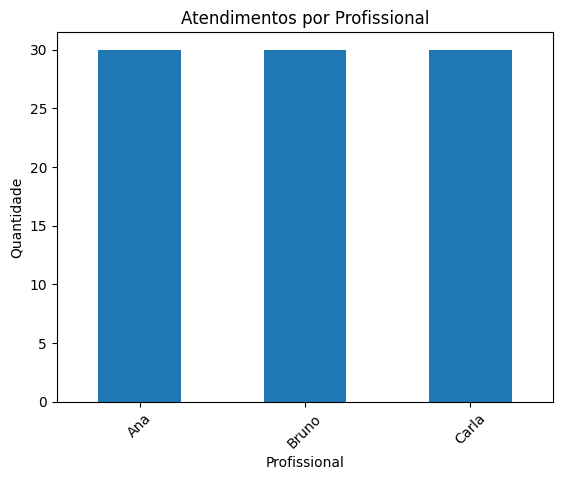

In [22]:
#grafico atendimento por profissional

plt.figure()
atendimentos_profissional.plot(kind='bar')
plt.title('Atendimentos por Profissional')
plt.xlabel('Profissional')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)
plt.show()

In [25]:
#faltas por profissional
faltas_profissional = (
    df[df['status'] == 'Faltou']
    .groupby('profissional')
    .size()
)

total_agendamentos = df.groupby('profissional').size()

taxa_faltas_profissional = (faltas_profissional / total_agendamentos * 100).fillna(0)

taxa_faltas_profissional

,0
profissional,
Ana,20.0
Bruno,20.0
Carla,20.0


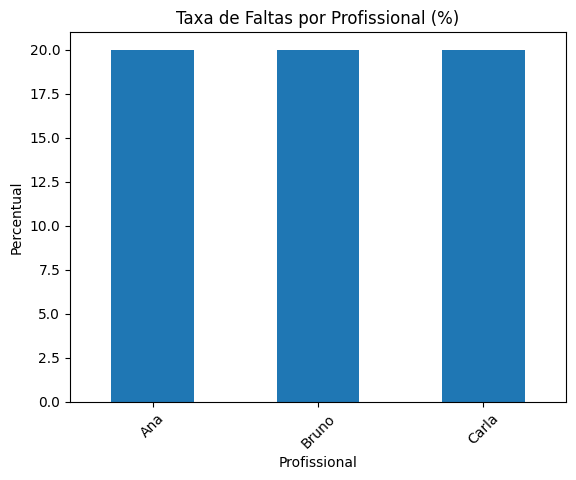

In [27]:
#GRAFICO DA TAXA DE FALTAS
plt.figure()
taxa_faltas_profissional.plot(kind='bar')
plt.title('Taxa de Faltas por Profissional (%)')
plt.xlabel('Profissional')
plt.ylabel('Percentual')
plt.xticks(rotation=45)
plt.show()


In [31]:
#RECEITA MEDIA POR ATENDIMENTO
receita_media = (
    df[df['status'] == 'Compareceu']
    .groupby('profissional')['valor_cobrado']
    .mean()
    .sort_values(ascending=False)
)

receita_media

,valor_cobrado
profissional,
Ana,960.0
Bruno,960.0
Carla,960.0


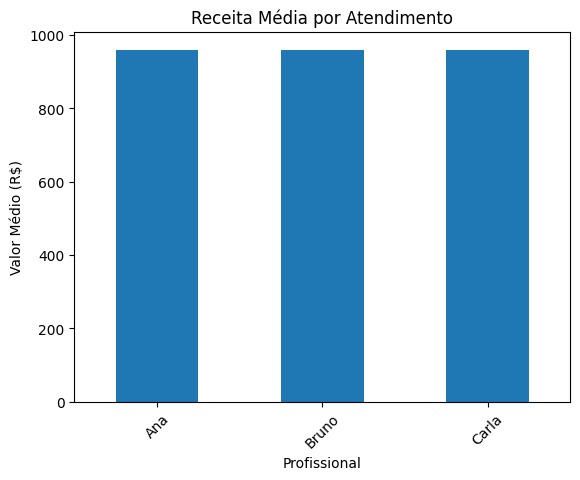

In [33]:
#GRAFICO MEDIA POR ATENDIMENTO
plt.figure()
receita_media.plot(kind='bar')
plt.title('Receita Média por Atendimento')
plt.xlabel('Profissional')
plt.ylabel('Valor Médio (R$)')
plt.xticks(rotation=45)
plt.show()


In [34]:
#INSIGHTS
print("📊 INSIGHTS OPERACIONAIS")
print("- Profissionais com maior faturamento:", faturamento_profissional.index[0])
print("- Profissionais com maior taxa de faltas:", taxa_faltas_profissional.sort_values(ascending=False).index[0])
print("- Profissionais mais produtivos:", atendimentos_profissional.index[0])


📊 INSIGHTS OPERACIONAIS
- Profissionais com maior faturamento: Ana
- Profissionais com maior taxa de faltas: Ana
- Profissionais mais produtivos: Ana
